In [33]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

## 1. Scrape the details of most viewed videos on YouTube from Wikipedia.

### Url = https://en.wikipedia.org/wiki/List_of_most-viewed_YouTube_videos

**You need to find following details:**

**A) Rank**

**B) Name**

**C) Artist**

**D) Upload date**

**E) Views**

In [2]:
# connecting to the crome
driver=webdriver.Chrome(r"chromedriver.exe")

In [3]:
# searching the website
driver.get("https://en.wikipedia.org/wiki/List_of_most-viewed_YouTube_videos")

In [30]:
rank=[]
name=[]
artist=[]
upload_date=[]
views=[]

In [31]:
ra=driver.find_elements(By.XPATH,'//table[@class="wikitable sortable jquery-tablesorter"][1]//tbody/tr/td[1]')
for i in ra:
    rank.append(i.text.split('.')[0])
    
na=driver.find_elements(By.XPATH,'//table[@class="wikitable sortable jquery-tablesorter"][1]//tbody/tr/td[2]')
for i in na:
    name.append(i.text.split('"')[1])
    
ar=driver.find_elements(By.XPATH,'//table[@class="wikitable sortable jquery-tablesorter"][1]//tbody/tr/td[3]')
for i in ar:
    artist.append(i.text)
    
up=driver.find_elements(By.XPATH,'//table[@class="wikitable sortable jquery-tablesorter"][1]//tbody/tr/td[5]')
for i in up:
    upload_date.append(i.text)
    
vi=driver.find_elements(By.XPATH,'//table[@class="wikitable sortable jquery-tablesorter"][1]//tbody/tr/td[4]')
for i in vi:
    views.append(i.text)

In [32]:
print(len(rank),len(name),len(artist),len(upload_date),len(views))

30 30 30 30 30


In [33]:
df=pd.DataFrame({'Rank':rank,'Video Name': name,'Artist name':artist,'Date of upload':upload_date,'Views in Billion':views})
df

,Rank,Video Name,Artist name,Date of upload,Views in Billion
0,1,Baby Shark Dance,Pinkfong Baby Shark - Kids' Songs & Stories,"June 17, 2016",12.85
1,2,Despacito,Luis Fonsi,"January 12, 2017",8.16
2,3,Johny Johny Yes Papa,LooLoo Kids,"October 8, 2016",6.70
3,4,Bath Song,Cocomelon – Nursery Rhymes,"May 2, 2018",6.20
4,5,Shape of You,Ed Sheeran,"January 30, 2017",6.00
5,6,See You Again,Wiz Khalifa,"April 6, 2015",5.89
6,7,Phonics Song with Two Words,ChuChu TV,"March 6, 2014",5.30
7,8,Wheels on the Bus,Cocomelon – Nursery Rhymes,"May 24, 2018",5.24
8,9,Uptown Funk,Mark Ronson,"November 19, 2014",4.92
9,10,Learning Colors – Colorful Eggs on a Farm,Miroshka TV,"February 27, 2018",4.89


In [34]:
driver.close()

## 2. Scrape the details team India’s international fixtures from bcci.tv.
### Url = https://www.bcci.tv/.
**You need to find following details:**

**A) Match title (I.e. 1stODI)**

**B) Series**

**C) Place**

**D) Date**

**E) Time**

**Note: - From bcci.tv home page you have reach to the international fixture page through code**

In [35]:
# Connecting to crome
driver=webdriver.Chrome(r"chromedriver.exe")

In [36]:
# opening the website
driver.get('https://www.bcci.tv/')

In [37]:
# Click on menu 
menu=driver.find_element(By.XPATH,'/html/body/nav/div[1]/button').click()

In [38]:
# Click on internation
int=driver.find_element(By.XPATH,'/html/body/nav/div[1]/div[2]/ul[1]/li[2]/a').click()

In [45]:
time.sleep(5)

In [46]:
match=[]
series=[]
place=[]
date=[]
time=[]

In [47]:
matc=driver.find_elements(By.XPATH,'//span[@class="matchOrderText ng-binding ng-scope"]')
for i in matc:
    match.append(i.text)
    
ser=driver.find_elements(By.XPATH,'//h5[@class="match-tournament-name ng-binding"]')
for i in ser:
    series.append(i.text)
    
pl=driver.find_elements(By.XPATH,'//div[@class="match-place ng-scope"]')
for i in pl:
    place.append(i.text.split('-')[1])
    
da=driver.find_elements(By.XPATH,'//div[@class="match-dates ng-binding"]')
for i in da:
    date.append(i.text)
    
ti=driver.find_elements(By.XPATH,'//div[@class="match-time no-margin ng-binding"]')
for i in ti:
    time.append(i.text)
    

In [48]:
print(len(match),len(series),len(place),len(date),len(time))

1 1 1 1 1


In [49]:
df=pd.DataFrame({'Match Title':match,'Series':series,'Venue':place,'Date':date,'Time':time})
df

,Match Title,Series,Venue,Date,Time
0,Final -,ICC WORLD TEST CHAMPIONSHIP FINAL 2023,"Kennington Oval, London",7 JUN 2023,3:30 PM IST


In [50]:
driver.close()

## 3. Scrape the details of State-wise GDP of India from statisticstime.com.
### Url = http://statisticstimes.com/
**You have to find following details:**

**A) Rank**

**B) State**

**C) GSDP(18-19)- at current prices**

**D) GSDP(19-20)- at current prices**

**E) Share(18-19)**

**F) GDP($ billion)**

**Note: - From statistics times home page you have to reach to economy page through code.**

In [15]:
# Connecting to crome
driver=webdriver.Chrome(r"chromedriver.exe")

In [16]:
# opening the website
driver.get('http://statisticstimes.com/')

In [17]:
# click economy
eco=driver.find_element(By.XPATH,'//div[2][@class="dropdown"]//button').click()

In [18]:
#  click india
ind=driver.find_element(By.XPATH,'//div[2][@class="dropdown"]//div//a[3]').click()

In [20]:
# click GDP of indian state
st=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[2]/ul/li[1]/a').click()

In [24]:
rank=[]
state=[]
gsdp19=[]
gsdp20=[]
share=[]
gdp=[]

In [25]:
# scrape rank
ra=driver.find_elements(By.XPATH,'//table[@class="display dataTable"]/tbody/tr/td[1]')
for i in ra[0:33]:
    rank.append(i.text)

# scrape state
st=driver.find_elements(By.XPATH,'//table[@class="display dataTable"]/tbody/tr/td[2]')
for i in st[0:33]:
    state.append(i.text)

# scrape gspd18-19
gs=driver.find_elements(By.XPATH,'//table[@class="display dataTable"]/tbody/tr/td[4]')
for i in gs[0:33]:
    gsdp19.append(i.text)

# scrape GSPD19-20
gst=driver.find_elements(By.XPATH,'//table[@class="display dataTable"]/tbody/tr/td[3]')
for i in gst[0:33]:
    gsdp20.append(i.text)

# scrape share
sh=driver.find_elements(By.XPATH,'//table[@class="display dataTable"]/tbody/tr/td[5]')
for i in sh[0:33]:
    share.append(i.text)

# scrape gdp
gd=driver.find_elements(By.XPATH,'//table[@class="display dataTable"]/tbody/tr/td[6]')
for i in gd[0:33]:
    gdp.append(i.text)


In [26]:
print(len(rank),len(state),len(gsdp19),len(gsdp20),len(share),len(gdp))

33 33 33 33 33 33


In [27]:
df=pd.DataFrame({"Rank":rank,'State':state,'GSDP(18-19)':gsdp19,'GSDP(19-20)':gsdp20,'Share':share,'GDP in billion':gdp})
df

,Rank,State,GSDP(18-19),GSDP(19-20),Share,GDP in billion
0,1,Maharashtra,"2,632,792",-,13.94%,399.921
1,2,Tamil Nadu,"1,630,208","1,845,853",8.63%,247.629
2,3,Uttar Pradesh,"1,584,764","1,687,818",8.39%,240.726
3,4,Gujarat,"1,502,899",-,7.96%,228.290
4,5,Karnataka,"1,493,127","1,631,977",7.91%,226.806
5,6,West Bengal,"1,089,898","1,253,832",5.77%,165.556
6,7,Rajasthan,"942,586","1,020,989",4.99%,143.179
7,8,Andhra Pradesh,"862,957","972,782",4.57%,131.083
8,9,Telangana,"861,031","969,604",4.56%,130.791
9,10,Madhya Pradesh,"809,592","906,672",4.29%,122.977


In [28]:
driver.close()

## 4. Scrape the details of trending repositories on Github.com.

### Url = https://github.com/

**You have to find the following details:**

**A) Repository title**

**B) Repository description**

**C) Contributors count**

**D) Language used**

**Note: - From the home page you have to click on the trending option from Explore menu through code.**

In [35]:
# Connecting to crome
driver=webdriver.Chrome(r"chromedriver.exe")

In [36]:
# opening the website
driver.get('https://github.com/')

In [44]:
menu=driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/header/div/div[1]/div[2]/button/span/span/div[2]').click()


In [45]:
opens=driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/header/div/div[2]/div/nav/ul/li[3]/button').click()
time.sleep(1)
treding=driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/header/div/div[2]/div/nav/ul/li[3]/div/div[3]/ul/li[2]/a').click()

In [127]:
title=[]
description=[]
count=[]
used=[]

In [128]:
ti=driver.find_elements(By.XPATH,'//h2[@class="h3 lh-condensed"]/a')
for i in ti:
    title.append(i.text)
    

de = driver.find_elements(By.XPATH, '//article[@class="Box-row"]')
for article in de:
    try:
        des = article.find_element(By.XPATH, './p')
        description.append(des.text)
    except:
        description.append('-')
    
co=driver.find_elements(By.XPATH,'//div[@class="f6 color-fg-muted mt-2"]/a[1]')
for i in co:
    count.append(i.text)
                                            
us=driver.find_elements(By.XPATH,'//div[@class="f6 color-fg-muted mt-2"]')
for i in us:
    try:
        x=i.find_element(By.XPATH,'./span/span[2]')
        used.append(x.text)
    except:
        used.append('-')


In [129]:
print(len(title),len(description),len(count),len(used))

25 25 25 25


In [130]:
df=pd.DataFrame({"Repository Title":title,'Repository Description':description,'Contribution Count':count,'Language Used':used})
df

,Repository Title,Repository Description,Contribution Count,Language Used
0,Zeqiang-Lai / DragGAN,"Online Demo and Implementation of DragGAN - ""D...","1,326",Python
1,JiauZhang / DragGAN,Implementation of DragGAN: Interactive Point-b...,"1,491",Python
2,google / comprehensive-rust,This is the Rust course used by the Android te...,"15,583",Rust
3,kyegomez / tree-of-thoughts,Plug in and Play Implementation of Tree of Tho...,"1,094",Python
4,microsoft / PowerToys,Windows system utilities to maximize productivity,"91,065",C#
5,psf / requests,"A simple, yet elegant, HTTP library.","49,620",Python
6,kanboard / kanboard,Kanban project management software,"7,420",PHP
7,microsoft / devhome,Windows Dev Home Application,952,C#
8,dalathegreat / BYD-Battery-Emulator-For-Gen24,This software converts the LEAF CAN into Modbu...,156,C++
9,kamiyaa / joshuto,ranger-like terminal file manager written in Rust,"1,839",Rust


In [131]:
driver.close()

## 5. Scrape the details of top 100 songs on billiboard.com.
### Url = https:/www.billboard.com/
**You have to find the following details:**

**A) Song name**

**B) Artist name**

**C) Last week rank**

**D) Peak rank**

**E) Weeks on board**

**Note: - From the home page you have to click on the charts option then hot 100-page link through code.**

In [132]:
# Connecting to crome
driver=webdriver.Chrome(r"chromedriver.exe")

In [140]:
# opening the website
driver.get('https:/www.billboard.com/')

In [141]:
# click on chart
chart=driver.find_element(By.XPATH,'/html/body/div[3]/header/div/div[2]/div/div/div[2]/div[2]/div/div/nav/ul/li[1]/a').click()

In [143]:
# click on hot 100 page
hot=driver.find_element(By.XPATH,'/html/body/div[3]/main/div[2]/div[3]/div/div/div[2]/div/div[1]/a/div')
time.sleep(3)
hot.click()

In [148]:
song=[]
artist=[]
last_rank=[]
peak_rank=[]
weeks_on_board=[]

In [149]:
fir_son=driver.find_element(By.XPATH,'//li[@class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light  lrv-u-padding-l-1@mobile-max"]/h3')
song.append(fir_son.text)

ar=driver.find_element(By.XPATH,'//li[@class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light  lrv-u-padding-l-1@mobile-max"]/span')
artist.append(ar.text)

        
so=driver.find_elements(By.XPATH,'//li[@class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light lrv-u-padding-l-050 lrv-u-padding-l-1@mobile-max"]/h3')
for i in so:
    song.append(i.text)
    

art=driver.find_elements(By.XPATH,'//li[@class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light lrv-u-padding-l-050 lrv-u-padding-l-1@mobile-max"]/span')
for i in art:
    artist.append(i.text)
    
las=driver.find_elements(By.XPATH,'//li[@class="o-chart-results-list__item // a-chart-color u-width-72 u-width-55@mobile-max u-width-55@tablet-only lrv-u-flex lrv-u-flex-shrink-0 lrv-u-align-items-center lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light u-background-color-white-064@mobile-max u-hidden@mobile-max"]')
for i in las[0::2]:
    last_rank.append(i.text)
    
pea=driver.find_elements(By.XPATH,'//li[@class="o-chart-results-list__item // a-chart-bg-color a-chart-color u-width-72 u-width-55@mobile-max u-width-55@tablet-only lrv-u-flex lrv-u-flex-shrink-0 lrv-u-align-items-center lrv-u-justify-content-center lrv-u-background-color-grey-lightest lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light u-hidden@mobile-max"]')
for i in pea[1::2]:
    peak_rank.append(i.text)
    
week=driver.find_elements(By.XPATH,'//li[@class="o-chart-results-list__item // a-chart-color u-width-72 u-width-55@mobile-max u-width-55@tablet-only lrv-u-flex lrv-u-flex-shrink-0 lrv-u-align-items-center lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light u-background-color-white-064@mobile-max u-hidden@mobile-max"]')
for i in week[1::2]:
    weeks_on_board.append(i.text)
    

In [150]:
print(len(song),len(artist),len(last_rank),len(peak_rank),len(weeks_on_board))

100 100 100 100 100


In [151]:
df=pd.DataFrame({'Song Name':song,'Artist Name':artist,'Last Week Rank':last_rank,'Peak Rank':peak_rank,'Weeks on Board':weeks_on_board})
df

,Song Name,Artist Name,Last Week Rank,Peak Rank,Weeks on Board
0,Last Night,Morgan Wallen,1,1,16
1,All My Life,Lil Durk Featuring J. Cole,-,2,1
2,Flowers,Miley Cyrus,3,1,18
3,Kill Bill,SZA,2,1,23
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,4,4,9
...,...,...,...,...,...
95,Forever,Lil Baby Featuring Fridayy,87,8,19
96,Private Landing,Don Toliver Featuring Justin Bieber & Future,100,72,6
97,I Heard,YoungBoy Never Broke Again,-,98,1
98,Sunrise,Morgan Wallen,89,30,11


In [152]:
driver.close()

## 6. Scrape the details of Highest selling novels.
### Url = https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-greycompare
**You have to find the following details:**
    
**A) Book name**

**B) Author name**

**C) Volumes sold**

**D) Publisher**

**E) Genre**


In [153]:
# Connecting to crome
driver=webdriver.Chrome(r"chromedriver.exe")

In [154]:
# opening the website
driver.get('https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-greycompare')

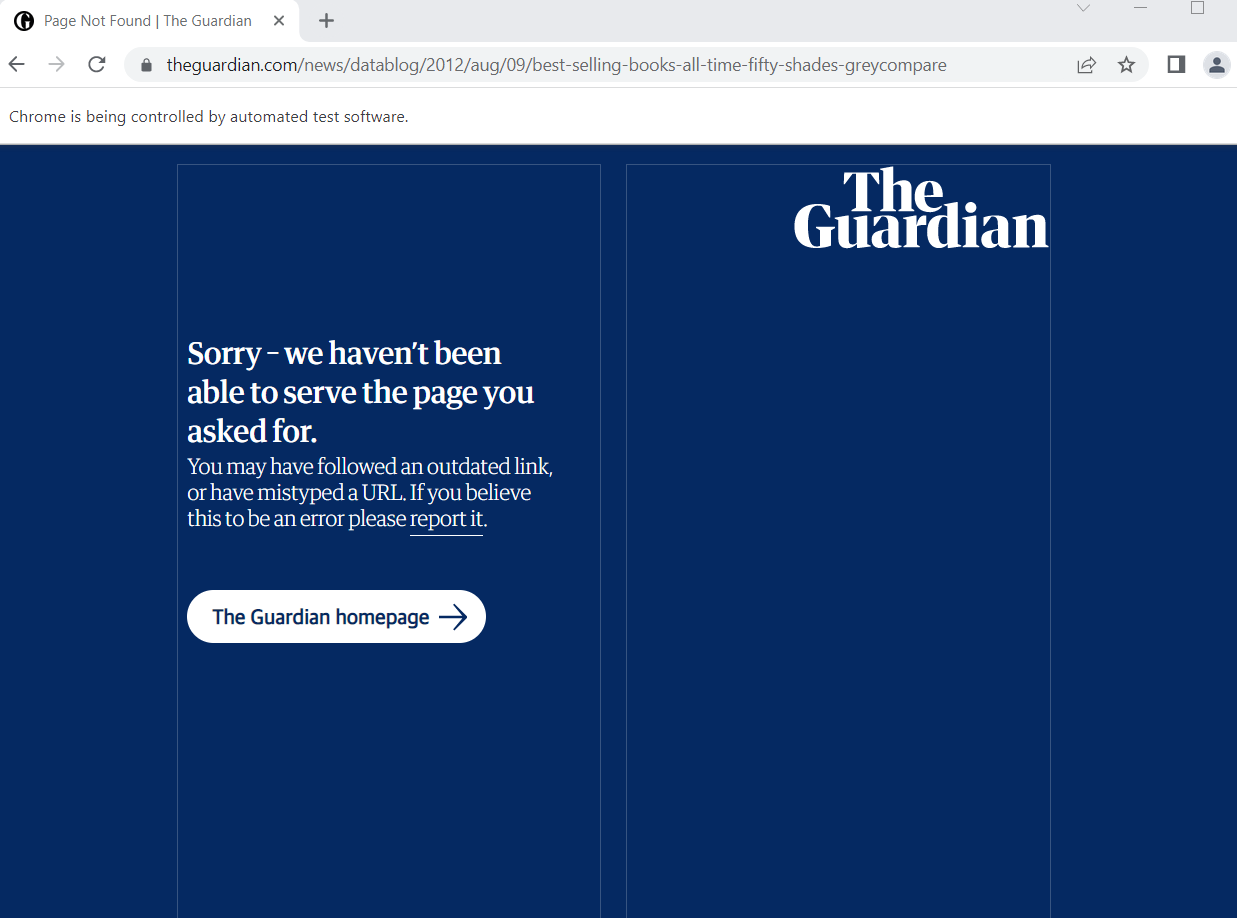

**As URL is no more found we can't scrape the required data.**

In [155]:
driver.close()

## 7. Scrape the details most watched tv series of all time from imdb.com.
### Url = https://www.imdb.com/list/ls095964455/
**You have to find the following details:**

**A) Name**

**B) Year span**

**C) Genre**

**D) Run time**

**E) Ratings**

**F) Votes**

In [156]:
# Connecting to crome
driver=webdriver.Chrome(r"chromedriver.exe")

In [157]:
# opening the website
driver.get(' https://www.imdb.com/list/ls095964455/')

In [158]:
name=[]
year_span=[]
genre=[]
run_time=[]
rating=[]
votes=[]

In [159]:
na=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/h3/a')
for i in na:
    name.append(i.text)
    
ye=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/h3/span[2]')
for i in ye:
    year_span.append(i.text)
    
ge=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/p/span[5]')
for i in ge:
    genre.append(i.text)
    
ru=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/p/span[3]')
for i in ru:
    run_time.append(i.text)
    
ra=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/div/div/span[2]')
for i in ra:
    rating.append(i.text)
    
vo=driver.find_elements(By.XPATH,'//div[@class="lister-item-content"]/p[4]/span[2]')
for i in vo:
    votes.append(i.text)

In [160]:
print(len(name),len(year_span),len(genre),len(run_time),len(rating),len(votes))

100 100 100 100 100 100


In [162]:
df=pd.DataFrame({'Name':name,'Year Span':year_span,'Genre':genre,'Run Time':run_time,'Rating':rating,'Votes':votes})
df

,Name,Year Span,Genre,Run Time,Rating,Votes
0,Game of Thrones,(2011–2019),"Action, Adventure, Drama",57 min,9.2,"2,162,438"
1,Stranger Things,(2016–2022),"Drama, Fantasy, Horror",51 min,8.7,"1,242,544"
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",44 min,8.1,"1,027,305"
3,13 Reasons Why,(2017–2020),"Drama, Mystery, Thriller",60 min,7.5,"302,200"
4,The 100,(2014–2020),"Drama, Mystery, Sci-Fi",43 min,7.6,"261,306"
...,...,...,...,...,...,...
95,Reign,(2013–2017),Drama,42 min,7.4,"51,676"
96,A Series of Unfortunate Events,(2017–2019),"Adventure, Comedy, Drama",50 min,7.8,"63,712"
97,Criminal Minds,(2005– ),"Crime, Drama, Mystery",42 min,8.1,"207,670"
98,Scream: The TV Series,(2015–2019),"Comedy, Crime, Drama",45 min,7,"43,208"


In [163]:
driver.close()

## 8. Details of Datasets from UCI machine learning repositories.
### Url = https://archive.ics.uci.edu/
**You have to find the following details:**

**A) Dataset name**

**B) Data type**

**C) Task**

**D) Attribute type**

**E) No of instances**

**F) No of attribute**

**G) Year**

**Note: - from the home page you have to go to the Show All Dataset page through code.**

In [164]:
# Connecting to crome
driver=webdriver.Chrome(r"chromedriver.exe")

In [165]:
# opening the website
driver.get(' https://archive.ics.uci.edu/')

In [166]:
# click on show all dataset
show=driver.find_element(By.XPATH,'/html/body/table[1]/tbody/tr/td[2]/span[2]/a/font/b').click()

In [180]:
dataset_name=[]
data_type=[]
task=[]
attribute_type=[]
no_of_instances=[]
no_of_attribute=[]
year=[]

In [181]:
ds=driver.find_elements(By.XPATH,'//table[@cellpadding="3"]/tbody/tr/td[2]/table[2]/tbody/tr/td[1]')
for i in ds[1:]:
    dataset_name.append(i.text.strip())
    
da=driver.find_elements(By.XPATH,'//table[@cellpadding="3"]/tbody/tr/td[2]/table[2]/tbody/tr/td[2]')
for i in da[1:]:
    data_type.append(i.text.strip())
    
ta=driver.find_elements(By.XPATH,'//table[@cellpadding="3"]/tbody/tr/td[2]/table[2]/tbody/tr/td[3]')
for i in ta[1:]:
    task.append(i.text.strip())
    
ata=driver.find_elements(By.XPATH,'//table[@cellpadding="3"]/tbody/tr/td[2]/table[2]/tbody/tr/td[4]')
for i in ata[1:]:
    attribute_type.append(i.text.strip())
    
ni=driver.find_elements(By.XPATH,'//table[@cellpadding="3"]/tbody/tr/td[2]/table[2]/tbody/tr/td[5]')
for i in ni[1:]:
    no_of_instances.append(i.text.strip())
    
na=driver.find_elements(By.XPATH,'//table[@cellpadding="3"]/tbody/tr/td[2]/table[2]/tbody/tr/td[6]')
for i in na[1:]:
    no_of_attribute.append(i.text.strip())
    
ye=driver.find_elements(By.XPATH,'//table[@cellpadding="3"]/tbody/tr/td[2]/table[2]/tbody/tr/td[7]')
for i in ye[1:]:
    year.append(i.text.strip())

In [182]:
print(len(dataset_name),len(data_type),len(task),len(attribute_type),len(no_of_instances),len(no_of_attribute),len(year))

622 622 622 622 622 622 622


In [183]:
df=pd.DataFrame({'Dataset Name':dataset_name,'Data Type':data_type,'Task':task,'Attribute Type':attribute_type,'No. of Instances':no_of_instances,'No of Attribute':no_of_attribute,'Year':year,})
df

,Dataset Name,Data Type,Task,Attribute Type,No. of Instances,No of Attribute,Year
0,Abalone,Multivariate,Classification,"Categorical, Integer, Real",4177,8,1995
1,Adult,Multivariate,Classification,"Categorical, Integer",48842,14,1996
2,Annealing,Multivariate,Classification,"Categorical, Integer, Real",798,38,
3,Anonymous Microsoft Web Data,,Recommender-Systems,Categorical,37711,294,1998
4,Arrhythmia,Multivariate,Classification,"Categorical, Integer, Real",452,279,1998
...,...,...,...,...,...,...,...
617,Influenza outbreak event prediction via Twitte...,Multivariate,Classification,"Integer, Real",75840,525,2020
618,Turkish Music Emotion Dataset,Multivariate,Classification,"Integer, Real",400,50,2020
619,Maternal Health Risk Data Set,,Classification,,1014,7,2020
620,Room Occupancy Estimation,"Multivariate, Time-Series",Classification,Real,10129,16,2021


In [184]:
driver.close()

## 9. Scrape the details of Data science recruiters 
### Url = https://www.naukri.com/hr-recruiters-consultants
**You have to find the following details:**

**A) Name**

**B) Designation**

**C)Company**

**D)Skills they hire for**

**E) Location**

**Note: - From naukri.com homepage click on the recruiters option and the on the search pane type Data science and
click on search. All this should be done through code**

In [185]:
# Connecting to crome
driver=webdriver.Chrome(r"chromedriver.exe")

In [186]:
# opening the website
driver.get('https://www.naukri.com/hr-recruiters-consultants')

In [187]:
search_panal=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[1]/div[1]/form/div[1]/div/div[1]/div[1]/div[2]/input')
search_panal.send_keys('Data science')
search_panal.submit()


In [212]:
name=[]
designation=[]
comapany=[]
skills_they_hire_for=[]
location=[]

In [214]:
while True:

    na=driver.find_elements(By.XPATH,'//div[@class="recInfo"]')
    for i in na:
        try:
            a=driver.find_elements(By.XPATH,'//span[@class="fl ellipsis"]')
            name.append(i.text)
        except:
            name.append('-')
    desi=driver.find_elements(By.XPATH,'//div[@class="recInfo"]')
    for i in desi:
        try:
            i=driver.find_elements(By.XPATH,'//span[@class="ellipsis clr"]')
            designation.append(i.text)
        except:
            designation.append('-')

    com=driver.find_elements(By.XPATH,'//div[@class="recInfo"]')
    for i in com:
        try:
            m=driver.find_elements(By.XPATH,'//a[2][@class="ellipsis"]')
            comapany.append(i.text)
        except:
            comapany.append('-')

    sk=driver.find_elements(By.XPATH,'//div[@class="recInfo"]')
    for i in sk:
        try:
            k=driver.find_elements(By.XPATH,'//div[@class="hireSec highlightable"]')
            skills_they_hire_for.append(i.text)
        except:
            skills_they_hire_for.append('-')

    lo=driver.find_elements(By.XPATH,'//div[@class="recInfo"]')
    for i in lo:
        try:
            x=i.find_element(By.XPATH,'//small[@class="ellipsis"]')
            location.append(i.text)
        except:
            location.append('-')
    try:
        next_button = driver.find_element(By.XPATH, f'//button[@class="grayBtn" and contains(text(), "Next")]')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException:
        break
    

In [215]:
print(len(name),len(designation),len(comapany),len(skills_they_hire_for),len(location))

4850 4850 4850 4850 4850


In [218]:
df=pd.DataFrame({"Name":name,'Designation':designation,'Company':comapany,'Skills They Hire For':skills_they_hire_for,'Location':location})
df.head()

,Name,Designation,Company,Skills They Hire For,Location
0,Aakash Harit\nHR Manager\nData Science Network...,-,Aakash Harit\nHR Manager\nData Science Network...,Aakash Harit\nHR Manager\nData Science Network...,Aakash Harit\nHR Manager\nData Science Network...
1,shravan Kumar Gaddam\nCompany Recruiter\nShore...,-,shravan Kumar Gaddam\nCompany Recruiter\nShore...,shravan Kumar Gaddam\nCompany Recruiter\nShore...,shravan Kumar Gaddam\nCompany Recruiter\nShore...
2,MARSIAN Technologies LLP\nCompany HR\nMARSIAN ...,-,MARSIAN Technologies LLP\nCompany HR\nMARSIAN ...,MARSIAN Technologies LLP\nCompany HR\nMARSIAN ...,MARSIAN Technologies LLP\nCompany HR\nMARSIAN ...
3,Anik Agrawal\nCompany Recruiter\nEnerlytics So...,-,Anik Agrawal\nCompany Recruiter\nEnerlytics So...,Anik Agrawal\nCompany Recruiter\nEnerlytics So...,Anik Agrawal\nCompany Recruiter\nEnerlytics So...
4,subhas patel\nFounder CEO\nLibraryXProject\nUK...,-,subhas patel\nFounder CEO\nLibraryXProject\nUK...,subhas patel\nFounder CEO\nLibraryXProject\nUK...,subhas patel\nFounder CEO\nLibraryXProject\nUK...


In [219]:
df.shape

(4850, 5)

In [220]:
driver.close()